In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Input, Dropout, Flatten, Activation, AveragePooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from numpy import expand_dims
import pandas as pd
import random
from pathlib import Path
from IPython.display import display
from PIL import Image
import pickle
import glob
import os
import cv2

In [58]:
os.listdir('/drive/My Drive/FaceMask/Dataset')

['Train', 'Test', 'Validation']

### Init the directory and variables


In [59]:
mainDirectory = '/drive/My Drive/FaceMask/Dataset/'
trainDirectory = mainDirectory+'Train/'
testDirectory = mainDirectory+'Test/'
validationDirectory = mainDirectory+'Validation/'

In [60]:
EPOCHS = 10
BATCH_SIZE = 256

### Augmentasi data

In [61]:
aug = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=2
    )

In [62]:
datatrain = aug.flow_from_directory(trainDirectory,
                                batch_size=BATCH_SIZE,
                                class_mode='binary',
                                target_size=(256,256))

datatest = aug.flow_from_directory(testDirectory,
                                batch_size=BATCH_SIZE,
                                class_mode='binary',
                                target_size=(256,256))

datavalidation = aug.flow_from_directory(validationDirectory,
                                batch_size=BATCH_SIZE,
                                class_mode='binary',
                                target_size=(256,256))

Found 13253 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Build Model

In [63]:
model = Sequential([
    Conv2D(64, kernel_size=(4,4), strides=2, activation='relu', padding='same', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(128, kernel_size=(4,4), strides=2, activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(256, kernel_size=(4,4), strides=2, activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 64)      3136      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         524544    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 256)        

In [65]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

### TRAIN

In [66]:
history = model.fit(datatrain,
                    epochs=EPOCHS,
                    validation_data=datavalidation)

Epoch 1/10
52/52 [==============================] - 238s 5s/step - loss: 0.4792 - accuracy: 0.7619 - val_loss: 0.2057 - val_accuracy: 0.9400
Epoch 2/10
52/52 [==============================] - 238s 5s/step - loss: 0.2890 - accuracy: 0.8630 - val_loss: 0.1641 - val_accuracy: 0.9563
Epoch 3/10
52/52 [==============================] - 244s 5s/step - loss: 0.2467 - accuracy: 0.8867 - val_loss: 0.1478 - val_accuracy: 0.9375
Epoch 4/10
52/52 [==============================] - 242s 5s/step - loss: 0.2211 - accuracy: 0.9020 - val_loss: 0.0846 - val_accuracy: 0.9712
Epoch 5/10
52/52 [==============================] - 241s 5s/step - loss: 0.2007 - accuracy: 0.9085 - val_loss: 0.0848 - val_accuracy: 0.9688
Epoch 6/10
52/52 [==============================] - 241s 5s/step - loss: 0.1989 - accuracy: 0.9137 - val_loss: 0.0405 - val_accuracy: 0.9862
Epoch 7/10
52/52 [==============================] - 238s 5s/step - loss: 0.1644 - accuracy: 0.9275 - val_loss: 0.0297 - val_accuracy: 0.9925
Epoch 8/10
52

In [67]:
model.save("/drive/My Drive/FaceMask/model.h5")

## EVALUATE MODEL

In [68]:
results = model.evaluate(datatest)

4/4 [==============================] - 11s 3s/step - loss: 0.0279 - accuracy: 0.9889


## PLOT RESULT

In [69]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

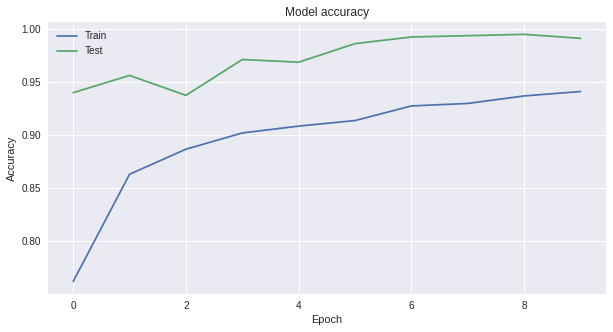

In [70]:
plt.rcParams['figure.figsize'] = [10, 5]

# Plot training & validation accuracy values
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('/drive/My Drive/FaceMask/accuracy.png')
plt.legend(['Train', 'Test'])

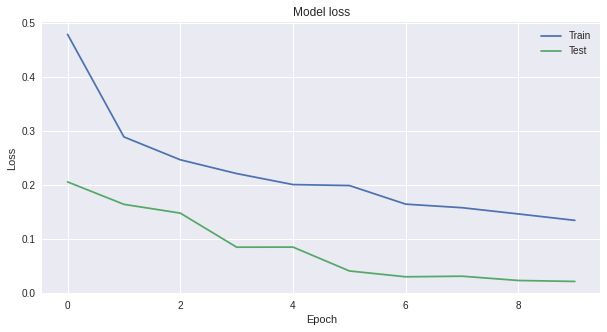

In [71]:
# Plot training & validation loss values
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('/drive/My Drive/FaceMask/lost.png')
plt.legend(['Train', 'Test'])

## PREDICT

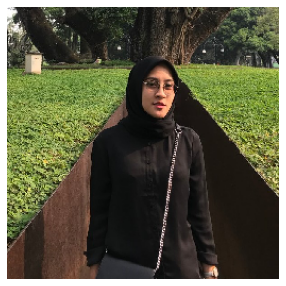

In [80]:
img = image.load_img('/drive/My Drive/FaceMask/data/4.jpg',target_size=(256,256))
plt.imshow(img)
plt.axis('off')
plt.show()

In [81]:
img = np.array(img, dtype='float')
img = img.reshape(1, 256, 256, 3)
prediksi = model.predict(img)
idx = prediksi[0][0]
if (idx):
    print("Not Wearing Masker")
else:
    print("Wearing Masker")

Not Wearing Masker
